# Final Year Project - Emoji Inset Creator Section

## Overview

In this section, a dataset is created containing three different types of images:

- Images with one emoji
- Images with two emojis
- Images with three emojis

The original images and emojis are retrieved and stored in dictionaries. The emojis are then added to the images and the resulting images are then saved in the EmojiImagesOne, EmojiImagesTwo and EmojiImagesThree folders respectively.

## Installing / Importing Packages

The following packages are required for the notebook to work.

In [1]:
#Installing and Importing Packages
from matplotlib import pyplot as plt
import cv2
import os
import math
from random import *
import tensorflow as tf
import tensorflow_addons as tfa

c:\Users\icemo\anaconda3\envs\fyp\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Creating Dictionary of Images

The images are retrieved from the Stock Images folder and stored in the images dictionary. Each image is also displayed to the user.

In [2]:
#Create dictionary for images
images = {}
counter = 1

for image in os.listdir("Test Images/NormalImages"):
    images[image.replace('.jpeg', '') + str(counter) + ".jpeg"] = cv2.imread("Test Images/NormalImages/" + image)[:,:,::-1]
    #Display image
    counter += 1

## Creating Dictionary of Emojis

The emojis are retrieved from the Stock Emojis folder. Prior to storing the emoji in the dictionary, a threshold is used to remove the background. Each emoji is also displayed to the user.

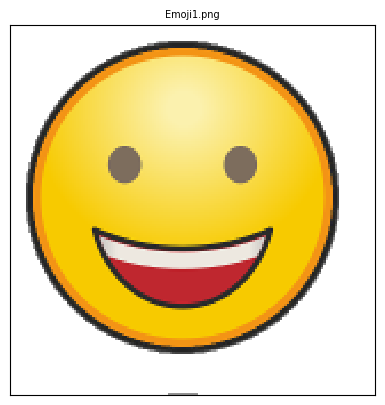

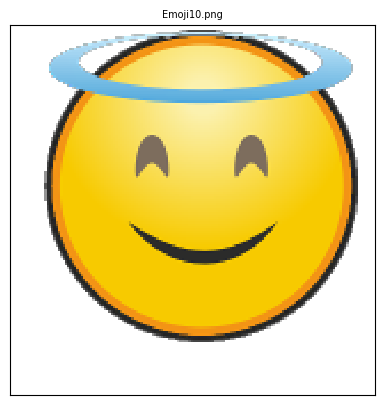

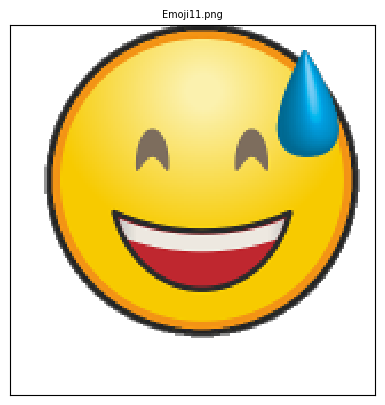

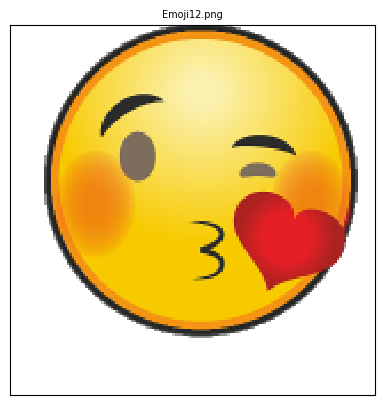

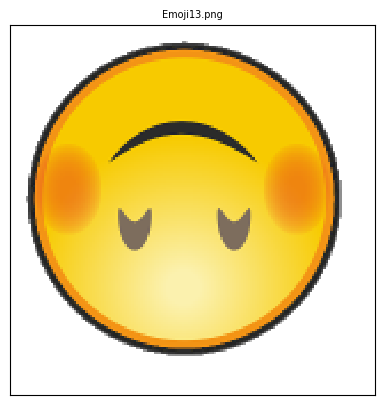

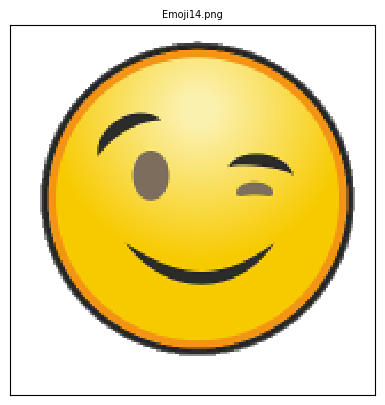

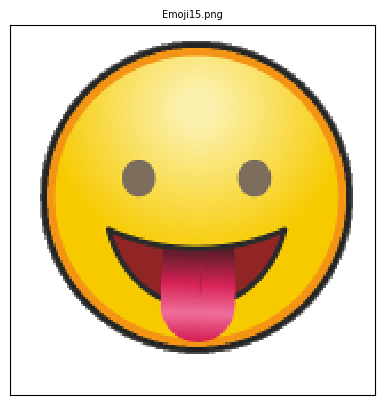

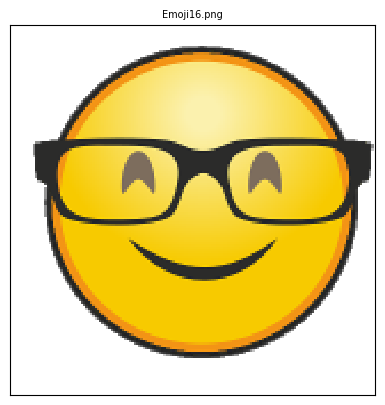

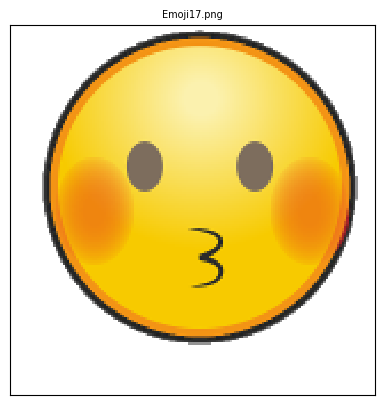

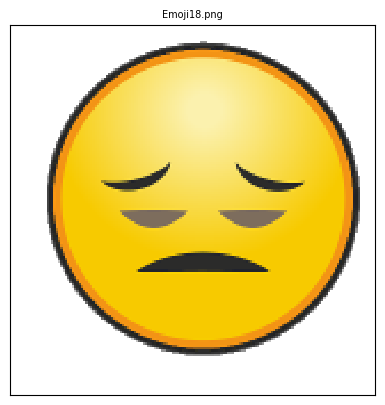

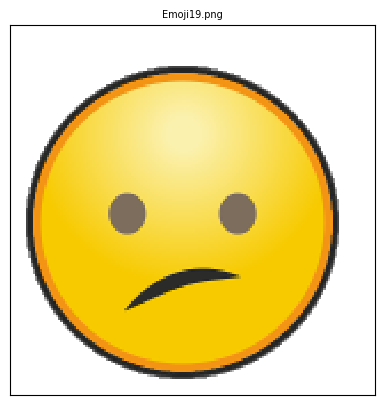

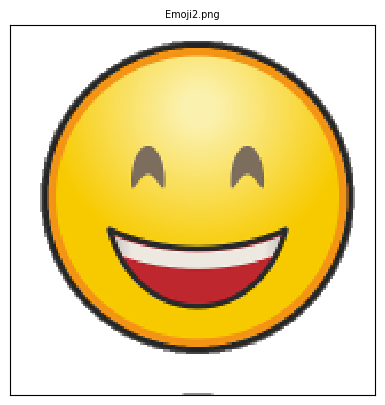

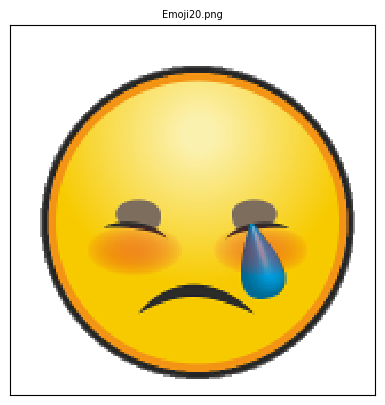

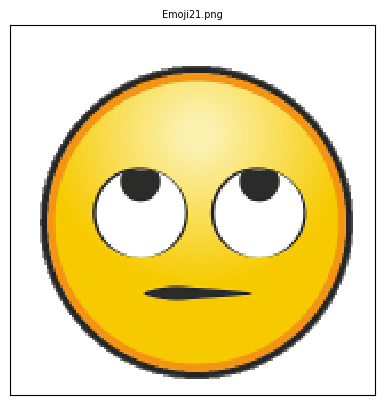

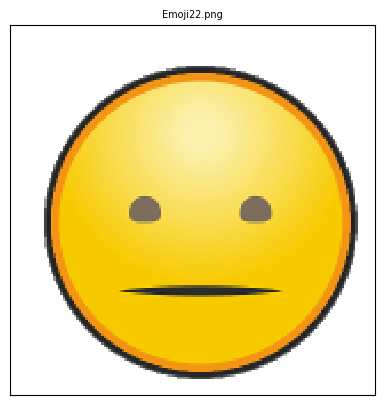

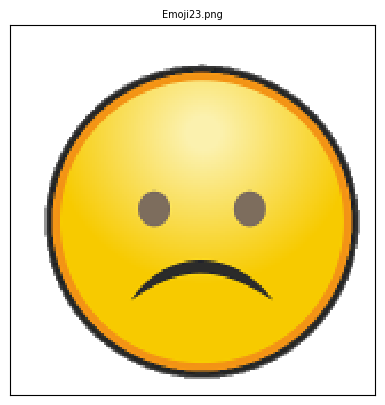

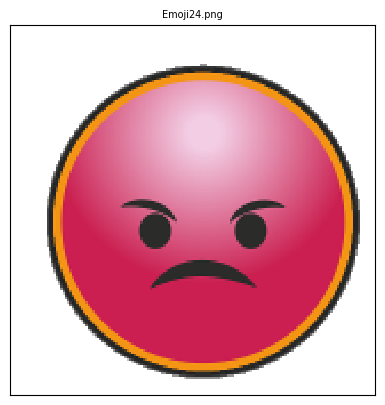

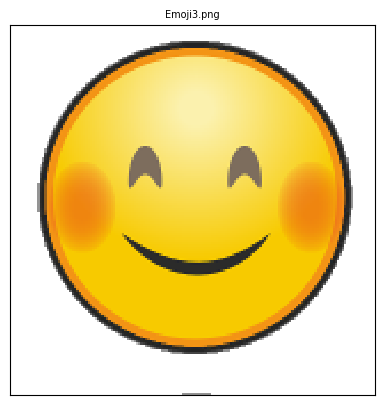

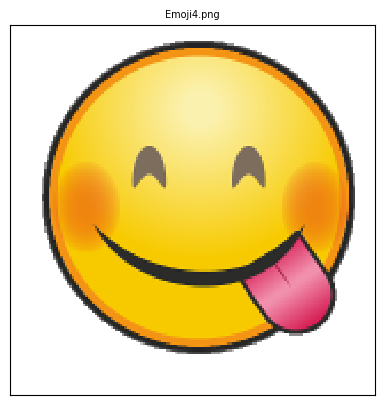

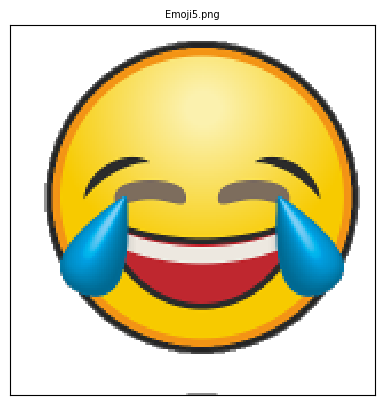

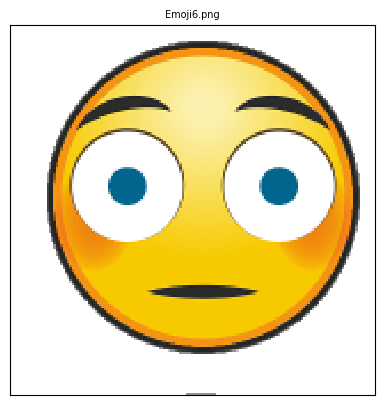

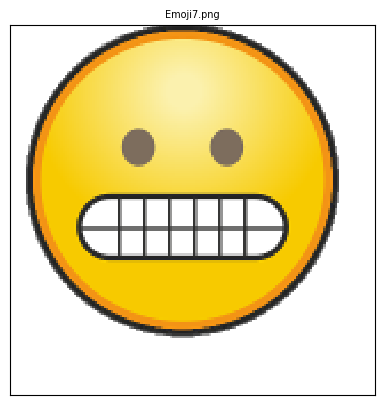

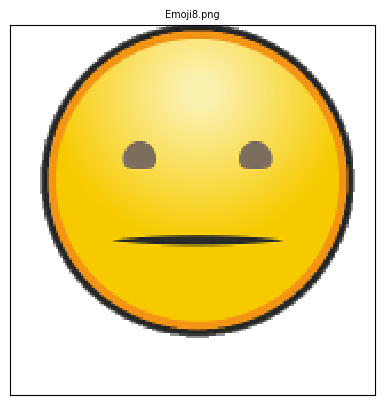

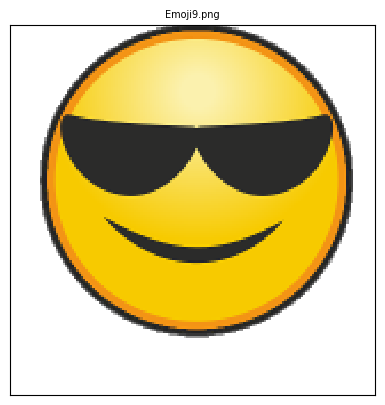

In [3]:
#Create dictionary for emojis
emojis = {}
#Iterate through each emoji in the folder
for emoji in os.listdir("Test Images/Stock Emojis"):
    
    #Save emoji in temporary variable
    sourceEmoji = cv2.imread("Test Images/Stock Emojis/" + emoji)[:,:,::-1]
    #Convert emoji to grayscale
    grayEmoji = cv2.cvtColor(sourceEmoji, cv2.COLOR_BGR2GRAY)
    #Threshold emoji
    _, alpha = cv2.threshold(grayEmoji, 0, 255, cv2.THRESH_BINARY)
    #Split channels
    b, g, r = cv2.split(sourceEmoji)
    #Create list of colour channels and alpha
    rgba = [b, g, r, alpha]
    #Merge list into multi-coloured image
    mergedEmoji = cv2.merge(rgba, 4)
    #Resize image by half its original size
    resizedEmoji = cv2.resize(mergedEmoji, (0,0), fx=0.5, fy=0.5) 
    #Add emoji to dictionary
    emojis[emoji] = resizedEmoji
    #Display emoji
    plt.title(emoji, size=7)
    plt.imshow(resizedEmoji, interpolation='nearest')
    plt.xticks([]),plt.yticks([])
    plt.show()

## Inset Images Function

This function takes four input parameters:

- **currentImages** - The list of images.
- **emojiImages** - The list of emojis.
- **emojiDictionary** - The dictionary to be filled in with inset images.
- **numOfEmojis** - The number of emojis to be inset into each image.

The function iterates through each image in the given list and depending on the numOfEmojis value, takes a random emoji from the list rotates it and places it on the current image. Also, offset values are used so that the emoji is always completely in the image. Each resulting image is then displayed to the user.

In [4]:
from PIL import Image, ImageEnhance

#Function to create inset images
def emojiInsetFunc(currentImages, emojiImages, emojiDictionary, numOfEmojis, directory):
    #Loop through each image in given list
    for image in currentImages:
        #Set the current image in the emojiDictionary to a copy of that in the currentImages list
        emojiDictionary[image] = currentImages[image].copy()
        #Loop for the number of times indicated by the numOfEmojis value
        for emojiNum in range(numOfEmojis):
            #Select random emoji from the list
            emoji = choice(list(emojiImages.values()))
            #Rotate the emoji and typecast it to float32
            emoji = tfa.image.rotate(emoji, randint(0, 360) * math.pi / 180, interpolation='BILINEAR')
            emoji = tf.cast(emoji, tf.float32)
            #Stretching the emoji
            emoji = tf.image.resize(emoji, size=(int(emoji.shape[0] * uniform(0.5, 1.5)), int(emoji.shape[1] * uniform(0.5, 1.5))))
            #Resizing the emoji
            resizingFactor = uniform(0.5, 1.5)
            emoji = tf.image.resize(emoji, size=(int(emoji.shape[0] * resizingFactor), int(emoji.shape[1] * resizingFactor)))
            #Creating offsets
            yOffset = randint(0, currentImages[image].shape[0]-emoji.shape[0])
            xOffset = randint(0, currentImages[image].shape[1]-emoji.shape[1])
            y1, y2 = yOffset, yOffset + emoji.shape[0]
            x1, x2 = xOffset, xOffset + emoji.shape[1]
            #Retrieve alpha channel
            alphaS = emoji[:, :, 3] / 255.0
            alphaL = 1.0 - alphaS
            #Loop through each channel
            for channel in range(0, 3):
                #Add emoji to image
                emojiDictionary[image][y1:y2, x1:x2, channel] = (alphaS * emoji[:, :, channel] + alphaL * emojiDictionary[image][y1:y2, x1:x2, channel])
        #Display Inset Image
        # plt.title(image, size=7)
        # plt.imshow(emojiDictionary[image], interpolation='nearest')
        # plt.xticks([]),plt.yticks([])
        # plt.show()
        cv2.imwrite(os.path.join(directory, image), cv2.cvtColor(emojiDictionary[image], cv2.COLOR_BGR2RGB))

## Creating Inset Images with one Emoji

This cell defines a dictionary which is then filled with inset images with one emoji by calling the emojiInsetFunc function.

In [5]:
#Create images with one emoji
emojiImagesOne = {}
emojiInsetFunc(images, emojis, emojiImagesOne, 1, "Test Images/EmojiImagesOne/")

## Creating Inset Images with two Emojis

This cell defines a dictionary which is then filled with inset images with two emojis by calling the emojiInsetFunc function.

In [6]:
#Create images with two emojis
emojiImagesTwo = {}
emojiInsetFunc(images, emojis, emojiImagesTwo, 2, "Test Images/EmojiImagesTwo/")

## Creating Inset Images with three Emojis

This cell defines a dictionary which is then filled with inset images with three emojis by calling the emojiInsetFunc function.

In [7]:
#Create images with three emojis
emojiImagesThree = {}
emojiInsetFunc(images, emojis, emojiImagesThree, 3, "Test Images/EmojiImagesThree/")

## Saving Images into folders

A check is performed to create the folders if they do not exist. Following this, each image is saved into its respective folder.

In [8]:
# #Create a new directory if it does not exist
# if not os.path.exists("Test Images/EmojiImagesOne/"):
#     os.makedirs("Test Images/EmojiImagesOne/")

# #Create a new directory if it does not exist
# if not os.path.exists("Test Images/EmojiImagesTwo/"):
#     os.makedirs("Test Images/EmojiImagesTwo/")

# #Create a new directory if it does not exist
# if not os.path.exists("Test Images/EmojiImagesThree/"):
#     os.makedirs("Test Images/EmojiImagesThree/")

# #For each image in emojiImagesOne, save it into its respective folder
# for image in emojiImagesOne:
    

# #For each image in emojiImagesTwo, save it into its respective folder
# for image in emojiImagesTwo:
#     cv2.imwrite(os.path.join("Test Images/EmojiImagesTwo/", image), cv2.cvtColor(emojiImagesTwo[image], cv2.COLOR_BGR2RGB))

# #For each image in emojiImagesThree, save it into its respective folder    
# for image in emojiImagesThree:
#     cv2.imwrite(os.path.join("Test Images/EmojiImagesThree/", image), cv2.cvtColor(emojiImagesThree[image], cv2.COLOR_BGR2RGB))